In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import *
import scikitplot as skplt
from statsmodels.discrete.discrete_model import Logit

In [3]:
data=pd.read_csv("default.csv")

In [5]:
data.shape #shape

(1000, 21)

In [6]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [8]:
data.default.value_counts(normalize=True)*100 #percentages of naive model

0    70.0
1    30.0
Name: default, dtype: float64

In [9]:
print("Duplicates:", data.duplicated().sum())       
print("Missing values:", data.isna().sum().sum())   
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


In [12]:
data.savings.isna().any().sum() #misisng values for one ccolumn

0

In [13]:
data.purpose.isna().any().sum()

0

In [17]:
print(data.purpose)

0               domestic appliances
1               domestic appliances
2      (vacation - does not exist?)
3                  radio/television
4                         car (new)
                   ...             
995                radio/television
996                      car (used)
997             domestic appliances
998             domestic appliances
999                      car (used)
Name: purpose, Length: 1000, dtype: object


In [14]:
data[data['purpose']=='business']['default'].value_counts(normalize=True)*100 #default rate for purpose

0    64.948454
1    35.051546
Name: default, dtype: float64

In [18]:
data[data['purpose']=='domestic appliances']['default'].value_counts(normalize=True)*100

0    77.857143
1    22.142857
Name: default, dtype: float64

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


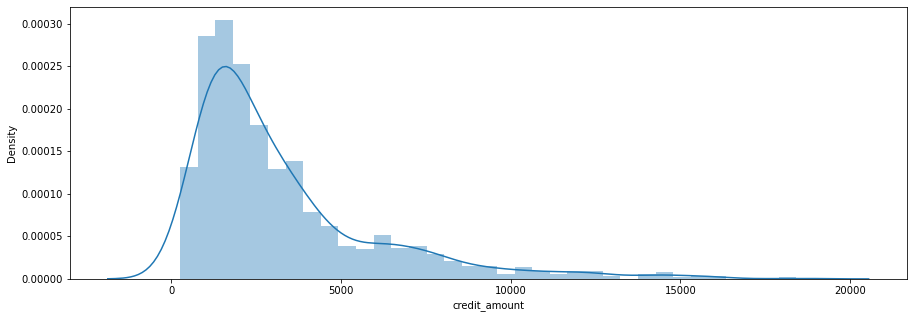

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(data.credit_amount)
plt.savefig("Credit_amoung.jpg")
plt.show() #distirbution
#we can devide the credit amount into binary variable with 1s representing the people who have credit amonut less than the mean and 0s representing people who have credit amount more than the mean

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


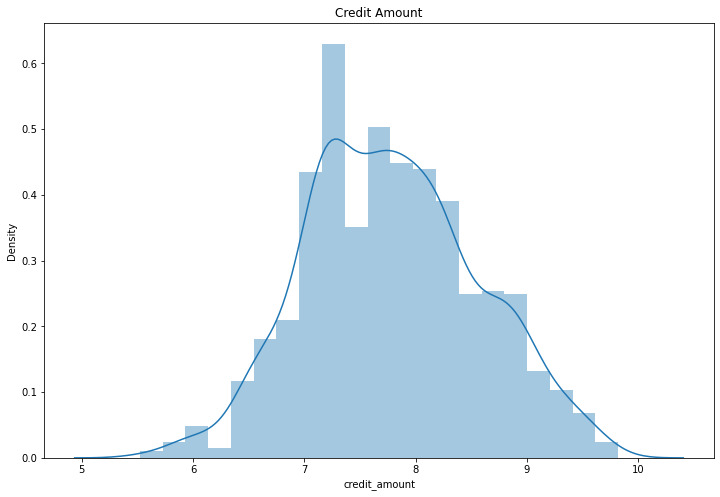

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(data.credit_amount))
plt.title("Credit Amount")
plt.show() 

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


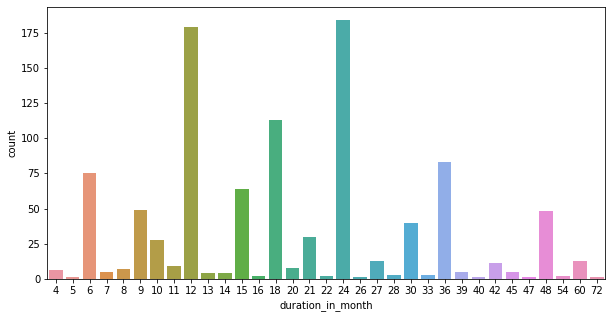

In [22]:
#seven
plt.figure(figsize=(10,5))
sns.countplot(data.duration_in_month)
plt.show()

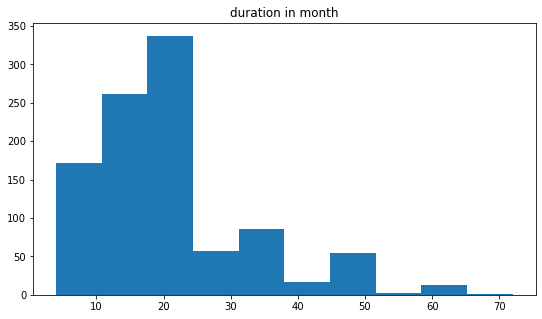

In [27]:
plt.figure(figsize=(9,5))
plt.hist(data.duration_in_month)
plt.title("duration in month")
plt.show()

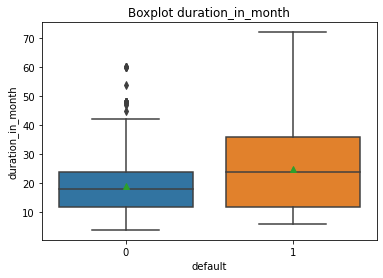

In [26]:
sns.boxplot(y=data["duration_in_month"], x=data["default"], showmeans=True, data=data)
plt.title("Boxplot duration_in_month")
plt.show()

In [28]:
# I think that the variable duration_in_month is significant, as the ranges of data are different. Also, the mean and median are different for defaults and non-defaults.

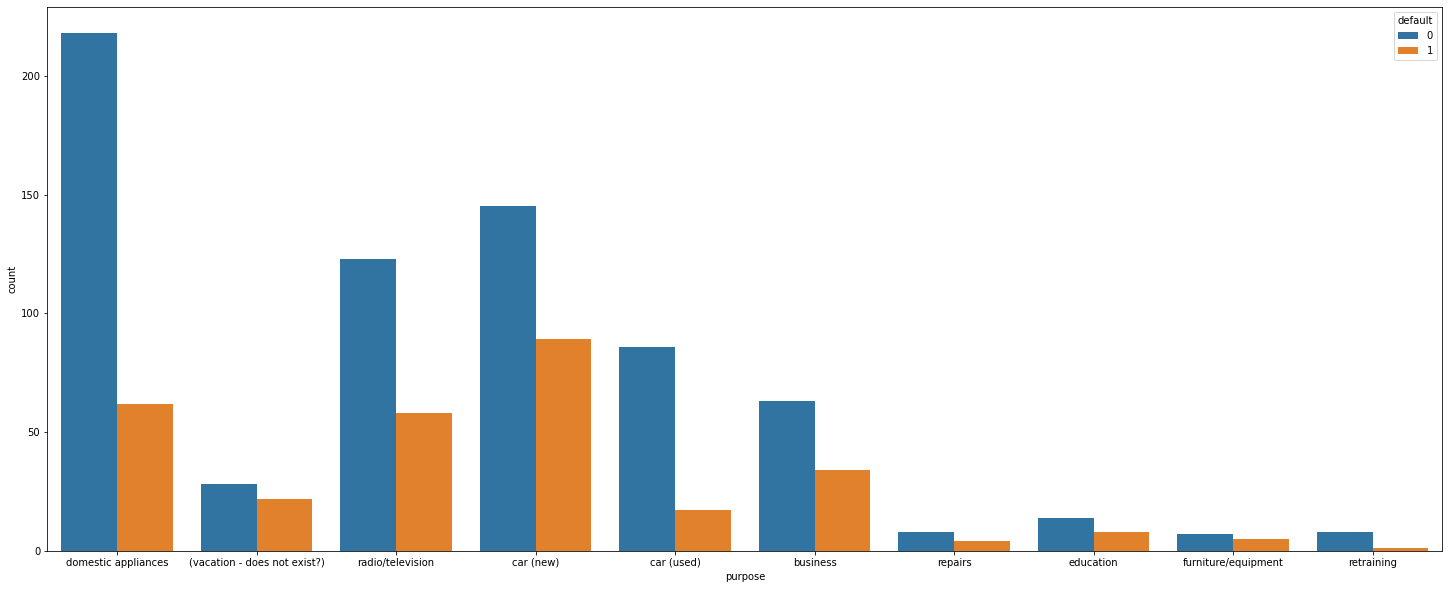

In [35]:
#countplot 8,9
plt.figure(figsize=(25,10))
sns.countplot(x="purpose", hue="default", data=data)
plt.savefig("Purpose_countplot.jpg")
plt.show() #I think all the categories are significant because default rate is different for each of them even though the 0s are amlost always greater than 1s.

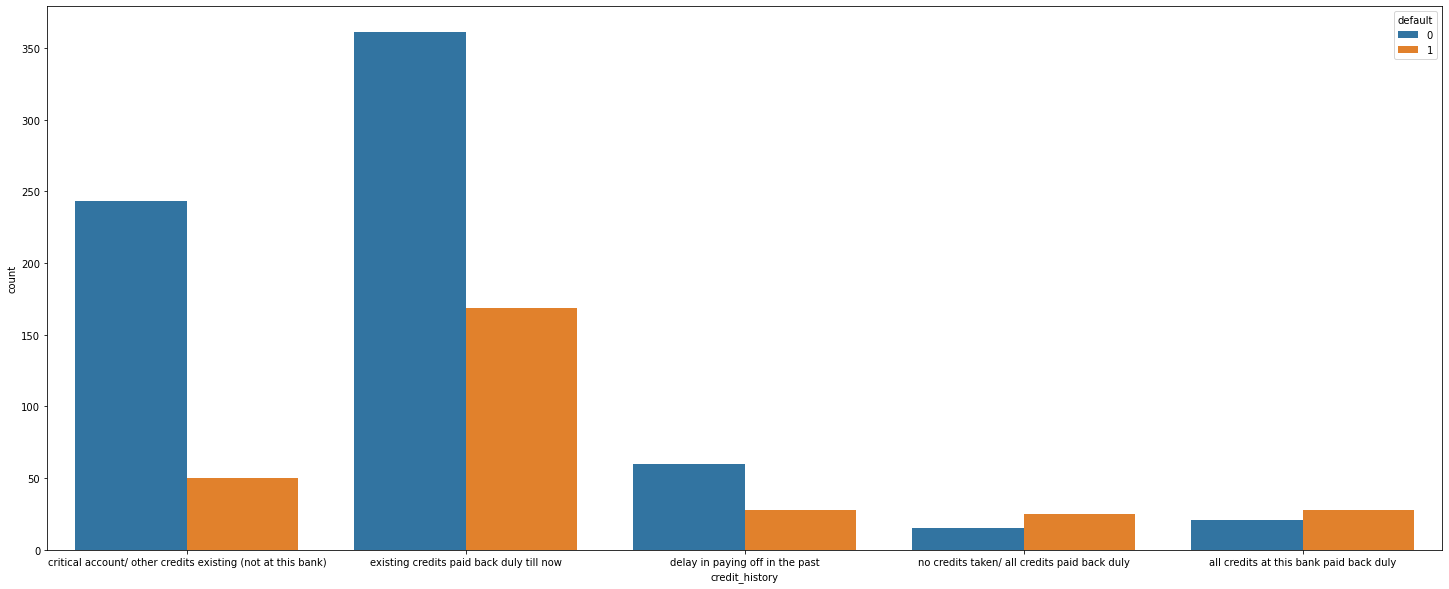

In [38]:
#countplot
plt.figure(figsize=(25,10))
sns.countplot(x="credit_history", hue="default", data=data)
plt.savefig("Credit_History_countplot.jpg")
plt.show()

<AxesSubplot:>

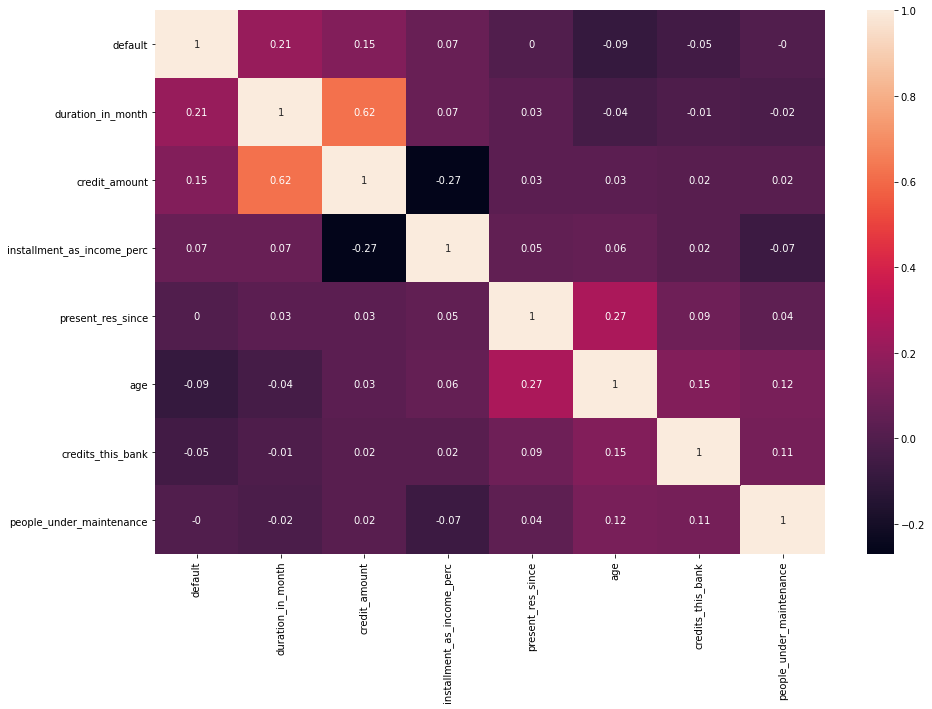

In [40]:
plt.figure(figsize=(15,10)) #10
sns.heatmap(data.corr().round(2), annot=True) #duration in month and credit_amount, positive

# Creating dummies

In [42]:
data_num=data.select_dtypes(exclude="object")
data_obj=data.select_dtypes(include="object")

In [43]:
data_dummies=pd.get_dummies(data_obj, prefix=data_obj.columns,drop_first=True)
data=data_num.join(data_dummies)

In [44]:
# separating x and y 

Y = data['default']
X = data.drop('default', axis = 1)

In [45]:
X=pd.get_dummies(X, drop_first=True) #creating dummies

In [46]:
data.shape #new shape

(1000, 49)

# Creating Logistics model

In [47]:
#tarin test split
X0, X1, Y0, Y1= train_test_split(X,Y, test_size=0.25, random_state=42)

In [48]:
#scaling the data 
scaler = StandardScaler()
scaler.fit(X0)
X0_scaled = pd.DataFrame(scaler.transform(X0), columns=X0.columns)
X1_scaled = pd.DataFrame(scaler.transform(X1), columns=X1.columns)

In [49]:
#creating the model
logit=LogisticRegression(random_state=42)
logit.fit(X0_scaled,Y0)

LogisticRegression(random_state=42)

In [50]:
# initial logitic regression 

logit  = LogisticRegression(C = 0.003, class_weight = None, random_state = 42).fit(X0_scaled, Y0)

In [51]:
#getting initial probabilities 

Y0_logit = logit.predict_proba(X0_scaled)[:,1]
Y1_logit = logit.predict_proba(X1_scaled)[:,1]

In [52]:
# caclualting roc_auc score 

print("ROC_AUC Train:", roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test:", roc_auc_score(Y1,Y1_logit))

ROC_AUC Train: 0.8163272165087047
ROC_AUC Test: 0.800483770287141


In [53]:
#setting up the ranges for hyperparameters

param_logit = {'class_weight':[None, "balanced"], 'C':np.linspace(0.001,0.1,10)}

# grid search for getting the best hyperparpameters

gs_logit = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid = param_logit, scoring = 'roc_auc', cv=5, verbose=1).fit(X0_scaled,Y0)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
#getting best parameters
best_params_logit = gs_logit.best_params_
best_params_logit

{'C': 0.001, 'class_weight': 'balanced'}

In [55]:
# fitting Logit with best params of the gridsearch 

logit_grid = LogisticRegression(C=best_params_logit['C'], class_weight = best_params_logit['class_weight'], random_state=42).fit(X0_scaled, Y0)

#getting probabilities 

Y0_logit = logit_grid.predict_proba(X0_scaled)[:,1]
Y1_logit = logit_grid.predict_proba(X1_scaled)[:,1]

#transform to binary prediction 

Y0_logit_bin = np.where(Y0_logit > 0.5,1,0)     #logit_grid.predict(X0_scaled)
Y1_logit_bin = np.where(Y1_logit > 0.5,1,0)

In [56]:

print("ROC_AUC Train:", roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test:", roc_auc_score(Y1,Y1_logit))
print("Recall Train:", recall_score(Y0,Y0_logit_bin))
print("Recall Test:", recall_score(Y1,Y1_logit_bin))
print("Accuracy Train:", accuracy_score(Y0,Y0_logit_bin))
print("Accuracy Test:", accuracy_score(Y1,Y1_logit_bin))

ROC_AUC Train: 0.8114455199300935
ROC_AUC Test: 0.7972066167290887
Recall Train: 0.7807017543859649
Recall Test: 0.7638888888888888
Accuracy Train: 0.7373333333333333
Accuracy Test: 0.74


# Decision Tree

In [95]:
dt1=DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=200).fit(X0,Y0)

In [96]:
# getting probabilities

Y0_dt_grid=dt1.predict_proba(X0)[:,1]
Y1_dt_grid=dt1.predict_proba(X1)[:,1]

In [97]:
print("ROC_AUC Train:", roc_auc_score(Y0,Y0_dt_grid))
print("ROC_AUC Test:", roc_auc_score(Y1,Y1_dt_grid))

ROC_AUC Train: 0.7073376688848558
ROC_AUC Test: 0.7349016853932584


In [98]:
param_dt={"max_depth":range(2,5), 'min_samples_leaf':(10,100,10), "class_weight":['balanced', None]}

In [99]:
gs_dt= GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid = param_dt, scoring = 'roc_auc', cv=5, verbose=1, n_jobs=-1).fit(X0,Y0)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [100]:
#let's see the optimal parameters

best_params_dt = gs_dt.best_params_
best_params_dt

{'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 100}

In [101]:
#fitting the model with the optimal parameters

dt1 = DecisionTreeClassifier(random_state =42, max_depth =best_params_dt['max_depth'], min_samples_leaf =best_params_dt['min_samples_leaf'], class_weight=best_params_dt['class_weight'] ).fit(X0, Y0)

In [102]:
# getting probabilities 

Y0_dt_grid =dt1.predict_proba(X0)[:,1]
Y1_dt_grid =dt1.predict_proba(X1)[:,1]

#transform to binary prediction 

Y0_dt_bin = np.where(Y0_dt_grid > 0.5,1,0) 
Y1_dt_bin = np.where(Y1_dt_grid > 0.5,1,0)

In [103]:
# calcualting roc_auc score 

print("ROC_AUC Train:", roc_auc_score(Y0,Y0_dt_grid))
print("ROC_AUC Test:", roc_auc_score(Y1,Y1_dt_grid))
print("Recall Train:", recall_score(Y0,Y0_dt_bin))
print("Recall Test:", recall_score(Y1,Y1_dt_bin))
print("Accuracy Train:", accuracy_score(Y0,Y0_dt_bin))
print("Accuracy Test:", accuracy_score(Y1,Y1_dt_bin))

ROC_AUC Train: 0.7317839618202595
ROC_AUC Test: 0.7258114856429463
Recall Train: 0.7324561403508771
Recall Test: 0.6805555555555556
Accuracy Train: 0.6733333333333333
Accuracy Test: 0.648


In [104]:
dt1.feature_importances_

array([0.14431271, 0.        , 0.        , 0.        , 0.06433565,
       0.        , 0.        , 0.        , 0.        , 0.72370956,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06764209, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [105]:
#making dataframe for convenient usage 

feat_imp = pd.DataFrame(dt1.feature_importances_, index = X.columns, columns=["Feature_imp"])
feat_imp = feat_imp.sort_values(by="Feature_imp", ascending = False)
feat_imp.head(10)

,Feature_imp
account_check_status_no checking account,0.723710
duration_in_month,0.144313
purpose_domestic appliances,0.067642
age,0.064336
"property_if not A121/A122 : car or other, not in attribute 6",0.000000
present_emp_since_1 <= ... < 4 years,0.000000
present_emp_since_4 <= ... < 7 years,0.000000
present_emp_since_unemployed,0.000000
personal_status_sex_male : divorced/separated,0.000000
personal_status_sex_male : married/widowed,0.000000


# Feature engineering

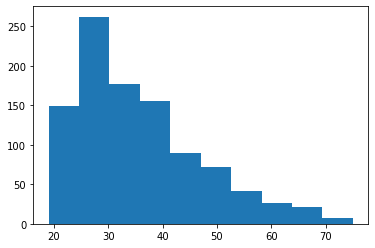

In [66]:
plt.hist(data_num["age"])
plt.show() #One may overcome overfitting by hyperparameter optimization in LG. T

In [79]:
data_num['age_categ'] = np.where(data_num['age']<40,1,2) #Cross-validation is a technique to fight overfitting. F

In [71]:
data.credit_amount.describe() #Gain and Lift charts are used to. T

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

In [83]:
data.credit_amount_new=np.where(data.credit_amount < 3271, 0, 1)

<ipython-input-83-da1448e7980b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.credit_amount_new=np.where(data.credit_amount < 3271, 0, 1)
